实验要求：提供了两组图像，对于每组图像，使用所学知识完成**无缝拼接**
- 拼接结果应自然，拼接处应无缝过渡

第 1 组拼接完成！结果已保存为 stitched_result_group1.jpg


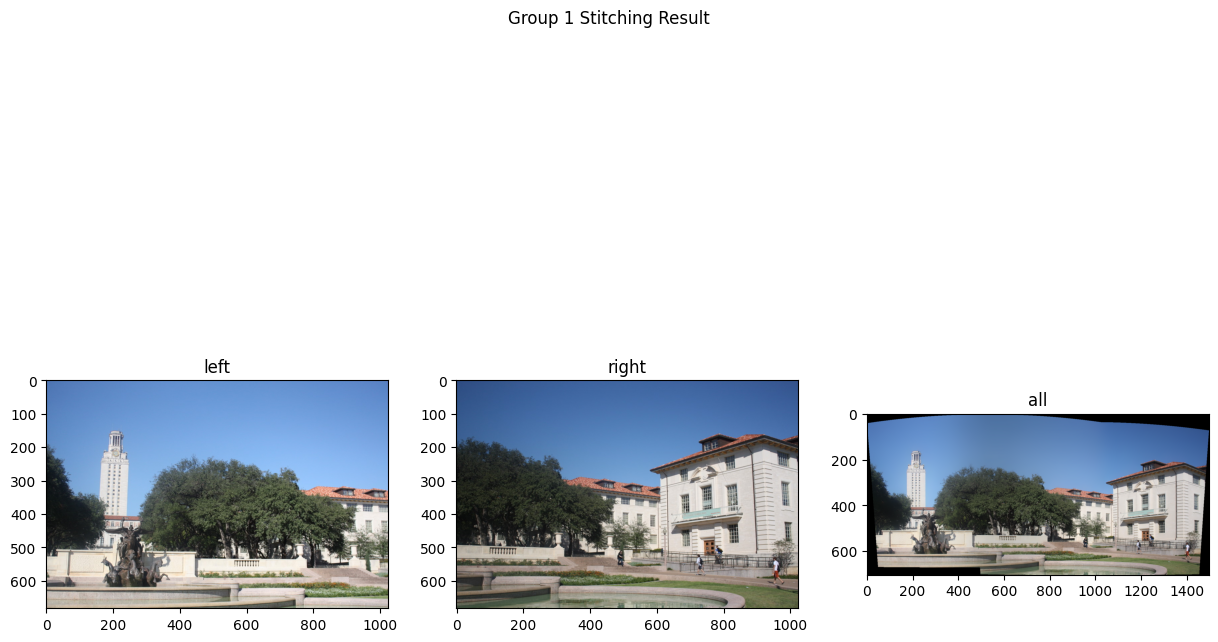

第 2 组拼接完成！结果已保存为 stitched_result_group2.jpg


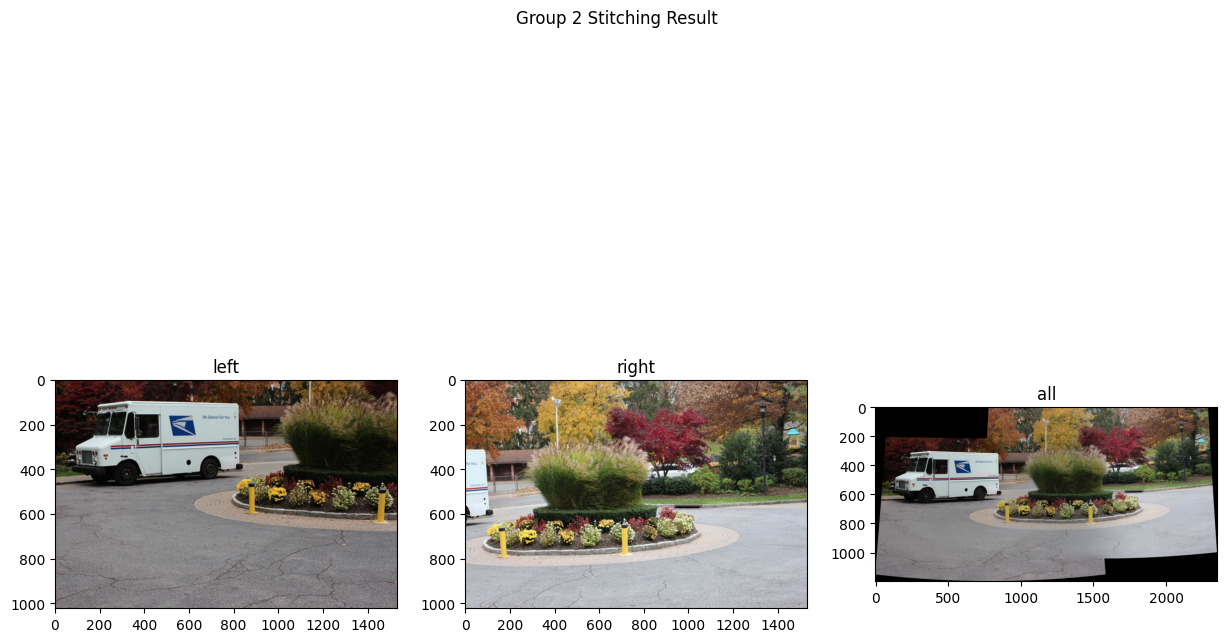

In [15]:
import cv2
import matplotlib.pyplot as plt

# 定义图像拼接函数（假设你已有 seamless_stitch 函数，若没有可使用 OpenCV 自带的拼接方法）
def seamless_stitch(img1, img2):
    # 这里是你原来的拼接逻辑，若没有可替换为 OpenCV 拼接：
    stitcher = cv2.Stitcher_create()
    status, stitched = stitcher.stitch([img1, img2])
    if status != cv2.Stitcher_OK:
        raise Exception("图像拼接失败")
    return stitched

# 第一组图像路径
img_paths1 = [
    r"F:\My-study\machine vision\No10\image_02\uttower_left.jpg",
    r"F:\My-study\machine vision\No10\image_02\uttower_right.jpg"
]

# 第二组图像路径
img_paths2 = [
    r"F:\My-study\machine vision\No10\image_01\AANAP_left.png",  # 假设第二组左图路径
    r"F:\My-study\machine vision\No10\image_01\AANAP_right.png" # 假设第二组右图路径
]

# 分组处理
for i, (paths, group_name) in enumerate([(img_paths1, "group1"), (img_paths2, "group2")]):
    # 读取图像
    img1 = cv2.imread(paths[0])
    img2 = cv2.imread(paths[1])
    if img1 is None or img2 is None:
        raise FileNotFoundError(f"第 {i+1} 组图像路径不正确或文件损坏！")
    
    # 拼接图像
    stitched_img = seamless_stitch(img1, img2)
    
    # 保存拼接结果
    save_path = f"stitched_result_{group_name}.jpg"
    cv2.imwrite(save_path, stitched_img)
    print(f"第 {i+1} 组拼接完成！结果已保存为 {save_path}")
    
    # 可视化结果
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("left")
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("right")
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
    plt.title("all")
    plt.suptitle(f"Group {i+1} Stitching Result")
    plt.show()